### **Step 1: Load the Data and Check for Missing Values** 
Before cleaning or analyzing the data, We need to understand its structure. This helps us see:
- How many rows and columns are in the dataset.
- What types of data are in each column.
- If there are any missing values that need to be handled.

In [20]:
import pandas as pd

# First, We need to load the data to understand its structure and check for any issues.
file_path = "../Dataset/Averages in in General Aptitude Tests aa.csv" 
df = pd.read_csv(file_path)  # Use read_csv to load the dataset from the file

# We use df.info() to see the number of rows and columns, and the data types for each column
df.info()  

# Here, We calculate the number of missing values in each column to check for any incomplete data
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)  # Print the result to identify columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   اسم_المدرسة                      6720 non-null   object 
 1   المنطقة_الإدارية                 6720 non-null   object 
 2   الإدارة_التعليمية                6707 non-null   object 
 3   المكتب_التعليمي                  6706 non-null   object 
 4   السلطة                           6720 non-null   object 
 5   نوع_التعليم                      6720 non-null   object 
 6   الجنس                            6720 non-null   object 
 7   نوع_الاختبار                     6720 non-null   object 
 8   تخصص_الاختبار                    6720 non-null   object 
 9   متوسط_أداء_الطلبة_في_المدرسة     6720 non-null   float64
 10  ترتيب_المدرسة_على_مستوى_المدارس  6720 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 577.6+ KB
Missing Values:
 اسم_ال

#### What We Found:
- The dataset has 6,720 rows and 11 columns.
- Most columns have no missing values, but:
  - **"الإدارة_التعليمية"** is missing 13 values.
  - **"المكتب_التعليمي"** is missing 14 values.

Since these columns have missing values, We will now remove the rows where data is missing to keep our dataset clean.

### **Step 2: Remove Rows with Missing Values**

Since we found missing values in the previous step, We decided to remove those rows instead of filling them with default values. This way, our dataset only contains complete information, which is better for analysis and machine learning models.

In [21]:
# Now we will remove all rows that have any missing values
df_cleaned = df.dropna()  # dropna() removes any row that contains a missing value

# After removing, We need to check if there are still any missing values
print("Missing Values After Removal:\n", df_cleaned.isnull().sum())

# Also, We will check the number of rows left after removing missing values
print(f"Number of rows before cleaning: {df.shape[0]}")
print(f"Number of rows after cleaning: {df_cleaned.shape[0]}")


Missing Values After Removal:
 اسم_المدرسة                        0
المنطقة_الإدارية                   0
الإدارة_التعليمية                  0
المكتب_التعليمي                    0
السلطة                             0
نوع_التعليم                        0
الجنس                              0
نوع_الاختبار                       0
تخصص_الاختبار                      0
متوسط_أداء_الطلبة_في_المدرسة       0
ترتيب_المدرسة_على_مستوى_المدارس    0
dtype: int64
Number of rows before cleaning: 6720
Number of rows after cleaning: 6706


#### What We Did:
- Used `df.dropna()` to remove all rows with missing values.
- Checked again if there are any missing values left.
- Compared the number of rows before and after cleaning to see how many rows were removed.


### **Step 3: Check for Duplicate Rows**
Duplicate rows can cause issues in data analysis and machine learning. If the same data appears multiple times, it can make certain patterns seem more important than they actually are, leading to bias in predictions.

In [22]:
# First, We will check if there are any duplicate rows in the dataset
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### What We Found:
- We used `df_cleaned.duplicated().sum()` to check for duplicate rows.
- The result was **0**, meaning there are no duplicate rows in the dataset.
- Since no duplicates were found, We didn't need to remove any rows.

### **Step 4: Convert Categorical Data to Numbers**
Machine learning models only work with numerical data, but our dataset has many text-based columns. To use these columns, we need to convert them into numbers. 

In [23]:
from sklearn.preprocessing import LabelEncoder

# First, We need to find all the categorical columns (the ones with text values)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns  # This gets only text columns
print("Categorical Columns:", categorical_columns)  # Print the names of these columns

# Now, We will apply Label Encoding to convert text into numbers
label_encoders = {}  # We'll store the encoders here in case We need them later
for col in categorical_columns:
    le = LabelEncoder()  # We use LabelEncoder to handle the conversion
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Transform text into numbers
    label_encoders[col] = le  # Save the encoder for this column

# Finally, We'll check the dataset to make sure the text columns are now numerical
df_cleaned.head()  # Display the first few rows to confirm the changes


Categorical Columns: Index(['اسم_المدرسة', 'المنطقة_الإدارية', 'الإدارة_التعليمية',
       'المكتب_التعليمي', 'السلطة', 'نوع_التعليم', 'الجنس', 'نوع_الاختبار',
       'تخصص_الاختبار'],
      dtype='object')


,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,نوع_الاختبار,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس
0,28,11,45,294,3,6,0,0,0,89.622377,1
1,2496,3,38,71,0,6,0,0,1,84.440000,1
2,3050,11,34,218,3,6,0,0,0,89.280423,2
3,1276,3,38,71,3,0,0,0,1,83.550000,2
4,3938,4,31,245,0,6,0,0,0,88.903225,3


#### What We Did:
1. Found all the categorical (text-based) columns using `select_dtypes(include=['object'])`.
2. Used **Label Encoding** to convert each unique category into a unique integer.
3. Saved the encoders in case We need to reverse the encoding later or reuse them for new data.
4. Checked the dataset to confirm that the text-based columns are now numerical.

### **Step 5: Normalize the Numerical Data**
Some numerical columns might have very different ranges, which can cause problems for machine learning models. For example, one column might have values like 1, 2, 3, while another has values like 1000, 2000, 3000. If we normalize the data, all columns will be scaled between 0 and 1, making it easier for the model to learn.

In [24]:
from sklearn.preprocessing import MinMaxScaler

# First, We will select only the numerical columns (since categorical columns are now encoded)
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()  # This will scale the data between 0 and 1

# Apply normalization to the numerical columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns]) 

# Check the first few rows to confirm the changes
df_cleaned.head()


,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,نوع_الاختبار,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس
0,0.006143,0.916667,0.957447,0.844828,0.75,0.75,0.0,0.0,0.0,1.000000,0.000000
1,0.547609,0.250000,0.808511,0.204023,0.00,0.75,0.0,0.0,1.0,0.872710,0.000000
2,0.669153,0.916667,0.723404,0.626437,0.75,0.75,0.0,0.0,0.0,0.991601,0.000443
3,0.279947,0.250000,0.808511,0.204023,0.75,0.00,0.0,0.0,1.0,0.850850,0.000443
4,0.863975,0.333333,0.659574,0.704023,0.00,0.75,0.0,0.0,0.0,0.982336,0.000886


#### What We Did:
1. Selected all numerical columns using `select_dtypes(include=['int64', 'float64'])`.
2. Used **MinMaxScaler** to scale the values of these columns between 0 and 1.
3. Checked the dataset to confirm the numerical columns are now normalized.

### **Step 6: Check if we need to Apply Data Transformation**
Transformation is needed when:
1. The data is not normally distributed (skewed).
2. The data has extreme outliers that can affect model performance.
3. The model requires log or power transformations to handle skewed data.

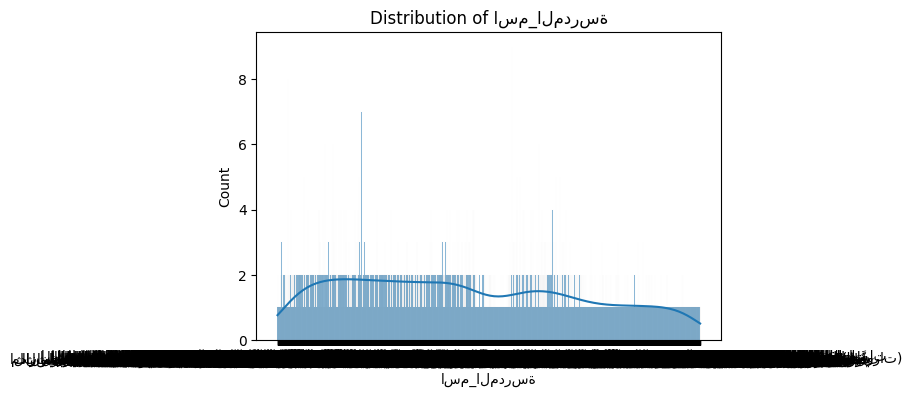

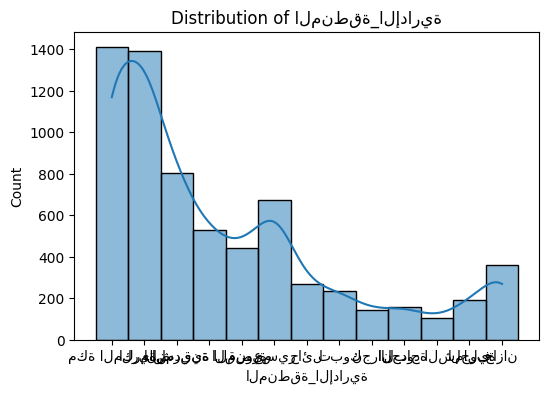

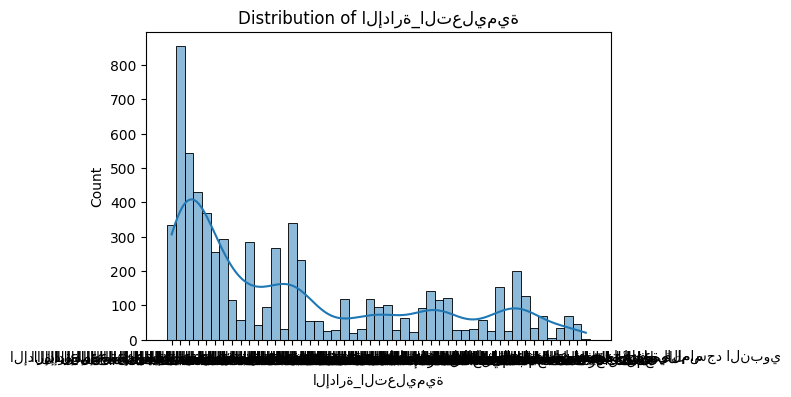

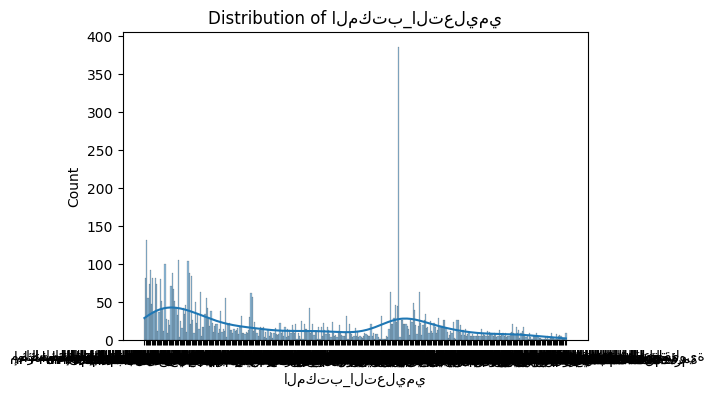

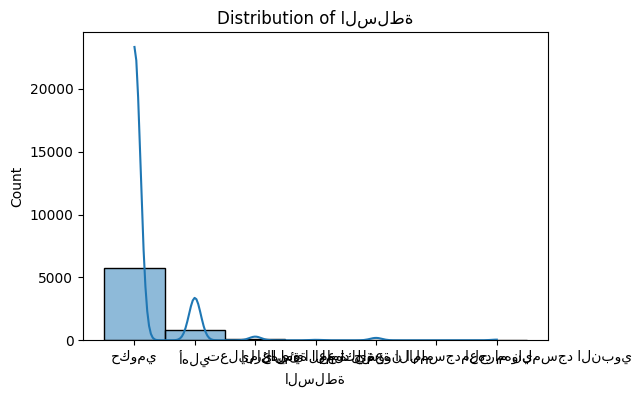

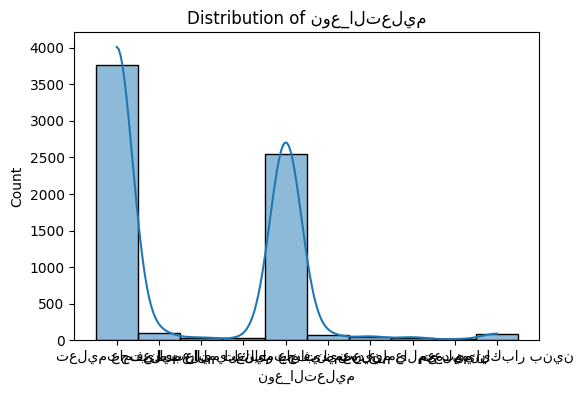

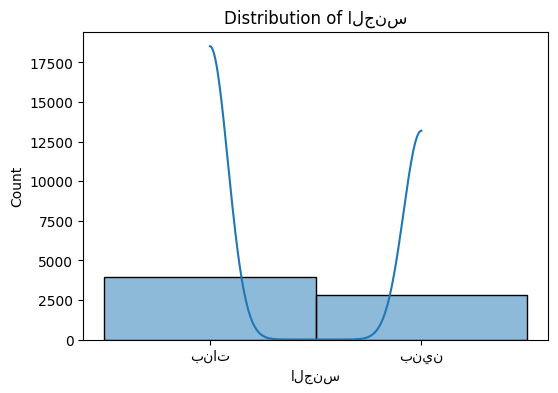

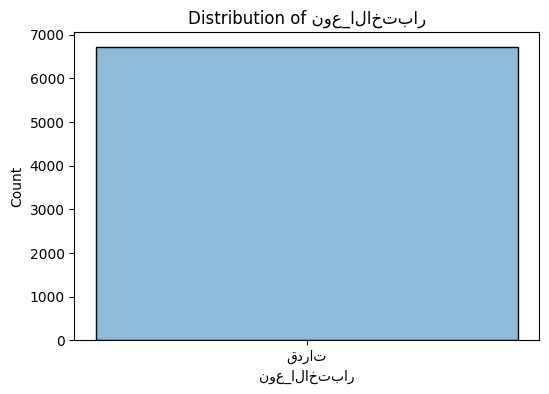

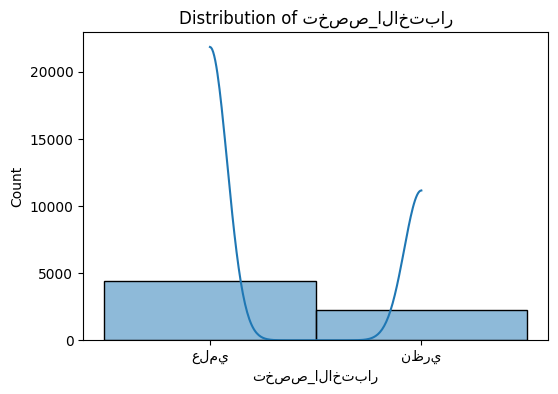

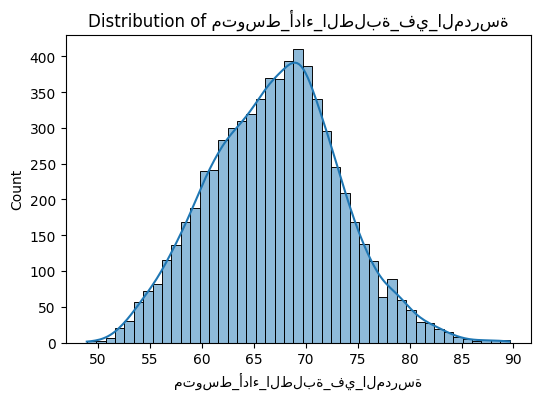

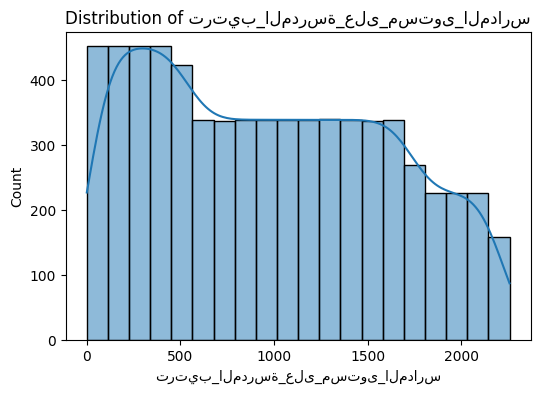

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#### What We Found:
- After plotting the distributions of all numerical columns, We observed that:
  - Most of the distributions are already well balanced or only slightly skewed.
  - There are no extreme outliers that require transformation.
  - The dataset is already normalized (values between 0 and 1), meaning no additional scaling is required.

- Since the numerical features are already in a good range and well distributed, transformation is not necessary.

### **Step 7: Save the Cleaned Dataset**

In [27]:
# Save the cleaned and preprocessed dataset to a CSV file
output_file_path = "../Dataset/Cleaned_Averages.csv"  # Choose the file path
df_cleaned.to_csv(output_file_path, index=False)  # Save without row indices

# Print confirmation
print(f" Cleaned dataset has been saved successfully to {output_file_path}")


 Cleaned dataset has been saved successfully to ../Dataset/Cleaned_Averages.csv
